In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input_data.csv' )

In [ ]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
data.shape

(8500, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
data.describe(include='all')

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [ ]:
data[['Short description', 'Description']] = data[['Short description', 'Description']].astype(str)

In [ ]:
data.loc[data['Description'].str.strip() == ''] 

,Short description,Description,Caller,Assignment group
6371,authorization add/delete members,\r\n\r\n,hpmwliog kqtnfvrl,GRP_0
7397,browser issue :,\r\n,fgejnhux fnkymoht,GRP_0


In [ ]:
data.loc[data['Short description'].str.strip() == ''] 

,Short description,Description,Caller,Assignment group


In [ ]:
data[data['Description'] == ''].index

Int64Index([], dtype='int64')

In [ ]:
data.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
data[data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group


In [ ]:
data[data['Description'].isnull()]

,Short description,Description,Caller,Assignment group


In [ ]:
callers = data['Caller'].str.lower().unique()

In [ ]:
data.shape

(8500, 4)

In [ ]:
#Convert 'Short description', 'Description' to str
data[['Short description', 'Description']] = data[['Short description', 'Description']].astype(str)

In [ ]:
import re 
#Clean the data
#lower the text , remove special character , numbers , emails , 
def clean_data(text):
    #remove caller name from text
    text=text.lower()
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
    #remove tab breaks
    text = re.sub(r"received from:",'',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"hello",'',text)
    text = re.sub(r'\t', '',text)
    
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    #Keep only alpabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  


In [ ]:
data['Short description'] = data['Short description'].apply(clean_data)
data['Description'] = data['Description'].apply(clean_data)

In [ ]:
data.loc[data['Short description'].str.strip() == ''].count()

Short description    50
Description          50
Caller               50
Assignment group     50
dtype: int64

In [ ]:
data.loc[data['Description'].str.strip() == ''].count()

Short description    47
Description          47
Caller               47
Assignment group     47
dtype: int64

In [ ]:
# apply function
data['Ticket'] = data.apply(lambda x: x['Description'] if x['Description'] ==
                     x['Short description']  else  x['Short description'] +" "+x['Description'], axis=1)

In [ ]:
data.loc[data['Ticket'].str.strip() == ''].count()

Short description    33
Description          33
Caller               33
Assignment group     33
Ticket               33
dtype: int64

In [ ]:
data.head()

,Short description,Description,Caller,Assignment group,Ticket
0,login issue,verified user details employee and manager nam...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...
1,outlook,team my meetings skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings skype meetings etc ar...
2,cant log in to vpn,i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn i cannot log on to vpn best
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Clean_input.csv')

There is other laguages also. So we need to traslate them to english.

There are 33 records blank Ticket

In [ ]:
!pip install langdetect
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'

data['langue'] = data['Ticket'].apply(detect_my)

In [ ]:
data['langue'].value_counts()

en         6673
de          389
sl          340
af          297
it          160
fr          125
no           72
sv           69
nl           63
es           59
ca           44
da           44
unknown      33
pt           20
ro           19
et           17
tl           17
pl           17
cy           12
fi            6
lv            6
sq            4
id            3
sk            3
so            3
hr            2
lt            2
cs            1
Name: langue, dtype: int64

In [ ]:
data['trans_ticketlangue']=""

In [ ]:
for index, row in data.iterrows():
  print(row['langue'])
  print("____")
  #row['trans_ticketlangue'] =  row['Ticket']
  if row['langue'] != 'en' :
    try:
        row['trans_ticketlangue'] =  translator.translate(row['Ticket']).text
        print('tranlated : ' + row['trans_ticketlangue'])
        print('Org  : '  + row['Ticket'])
        data.loc[index, 'trans_ticketlangue'] = row['trans_ticketlangue']
        print("-------------")
    except:
        data.loc[index, 'trans_ticketlangue'] = row['Ticket']
  else:
    data.loc[index, 'trans_ticketlangue'] = row['Ticket']


Streaming output truncated to the last 5000 lines.
en
____
de
____
tranlated : change def monitor please exchange the def monitor of the ventilation control in the boiler room contact ssler christgrytian
Org  : def montitor wechseln bitte den def monitor von der ftungssteuerung im heizraum tauschen kontakt ssler christgrytian
-------------
en
____
af
____
tranlated : outlook hangs does not open
Org  : outlook hangs does not open
-------------
en
____
sl
____
tranlated : job job failed in job scheduler at
Org  : job job failed in job scheduler at
-------------
en
____
de
____
tranlated : r mos defect
Org  : r maus defekt
-------------
de
____
tranlated : pc at reinecker wzs probably defective masc ne stands
Org  : pc an reinecker wzs wahrscheinlich defekt masc ne steht
-------------
en
____
en
____
de
____
tranlated : printer no longer works after changing the toner
Org  : drucker geht nach tonerwechsel nicht mehr
-------------
sl
____
tranlated : job job failed in job scheduler at
Org 

In [ ]:
data.loc[data['trans_ticketlangue'].str.strip() == ''].count()

Short description     33
Description           33
Caller                33
Assignment group      33
Ticket                33
langue                33
trans_ticketlangue    33
dtype: int64

In [ ]:
data.head()

,Short description,Description,Caller,Assignment group,Ticket,langue,trans_ticketlangue
0,login issue,verified user details employee and manager nam...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...,en,login issue verified user details employee and...
1,outlook,team my meetings skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings skype meetings etc ar...,en,outlook team my meetings skype meetings etc ar...
2,cant log in to vpn,i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn i cannot log on to vpn best,en,cant log in to vpn i cannot log on to vpn best
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,en,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,no,skype error


In [ ]:
#Drop Not required columns 
finaldf = data.drop(['Caller' , 'Short description' , 'Description' , 'Caller' , 'Ticket' , 'langue'],  axis = 1 )

Lemmatisation and stop words removal

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(finaldf['trans_ticketlangue']):
  finaldf['trans_ticketlangue'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

finaldf['trans_ticketlangue'] = finaldf['trans_ticketlangue'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#number of length in each Ticket
finaldf['length']=[len(text) for text in finaldf['trans_ticketlangue']]
#number of words in each Ticket
finaldf['len_words'] = finaldf['trans_ticketlangue'].apply(lambda x: len(x.split(" ")))

In [ ]:
finaldf.shape

(8500, 4)

In [ ]:
finaldf.loc[finaldf['trans_ticketlangue'] == ''].count()

Assignment group      37
trans_ticketlangue    37
length                37
len_words             37
dtype: int64

In [ ]:
finaldf.loc[finaldf['trans_ticketlangue'] == 'nan'].count()

Assignment group      0
trans_ticketlangue    0
length                0
len_words             0
dtype: int64

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Assignment group    8500 non-null   object
 1   trans_ticketlangue  8500 non-null   object
 2   length              8500 non-null   int64 
 3   len_words           8500 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 265.8+ KB


In [ ]:
import numpy as np  
  # Replace empty strings with Null
finaldf['trans_ticketlangue'].replace('', np.nan, inplace = True)

In [ ]:
finaldf.shape

(8500, 4)

In [ ]:
finaldf['trans_ticketlangue'].replace('nan', np.nan, inplace = True)

In [ ]:
finaldf.shape

(8500, 4)

In [ ]:
finaldf.isnull().sum()

Assignment group       0
trans_ticketlangue    37
length                 0
len_words              0
dtype: int64

In [ ]:
finaldf.dropna(inplace=True)

In [ ]:
finaldf.shape

(8463, 4)

In [ ]:
finaldf.head()

,Assignment group,trans_ticketlangue,length,len_words
0,GRP_0,login issue verify user detail employee manage...,150,24
1,GRP_0,outlook team meeting skype meeting etc appear ...,98,14
2,GRP_0,can not log vpn can not log vpn well,36,9
3,GRP_0,unable access hr tool page,26,5
4,GRP_0,skype error,11,2


In [ ]:
data1=finaldf[finaldf['len_words']<2].copy()

In [ ]:
data1.shape

(44, 4)

In [ ]:
data1

,Assignment group,trans_ticketlangue,length,len_words
39,GRP_0,call,4,1
51,GRP_0,call,4,1
229,GRP_0,call,4,1
823,GRP_0,boot,4,1
1271,GRP_30,fe,2,1
1710,GRP_48,stp,3,1
1712,GRP_48,outlook,7,1
1805,GRP_30,wifi,4,1
2714,GRP_0,call,4,1
2848,GRP_0,k,1,1


In [ ]:
finaldf.drop(finaldf[finaldf['len_words'] < 2].index, inplace = True)

In [ ]:
#find duplicates
finaldf.duplicated(subset=['trans_ticketlangue' , 'Assignment group' ]).sum()
#There are  records which are duplicate

1793

In [ ]:
finaldf.duplicated(subset=['trans_ticketlangue' , 'Assignment group' ]).groupby

In [ ]:
#remove duplicates
finaldf.drop_duplicates(subset=['trans_ticketlangue' ,'Assignment group' ] , keep='first' , inplace=True)

In [ ]:
finaldf.duplicated(subset=['trans_ticketlangue' , 'Assignment group' ]).sum()

0

In [ ]:
#find rows which have words length less then 2
finaldf.shape

(6626, 4)

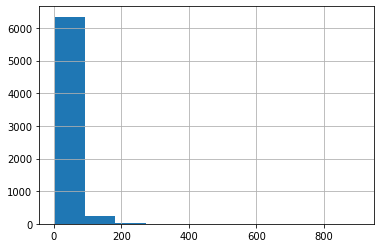

In [ ]:
finaldf['len_words'].hist(bins=30)

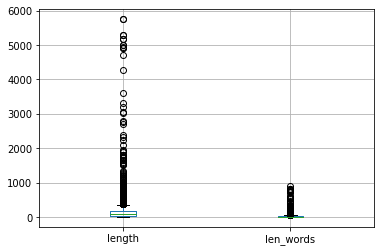

In [ ]:
finaldf.boxplot()

In [ ]:
finaldf.describe()
#length of the text is skewed

,length,len_words
count,6626.000000,6626.000000
mean,153.646091,23.523845
std,300.519241,46.148304
min,5.000000,2.000000
25%,39.000000,6.000000
50%,88.000000,14.000000
75%,169.750000,25.000000
max,5749.000000,904.000000


In [ ]:
finaldf['Assignment group'].value_counts()
#top 30 gropu

GRP_0     3091
GRP_8      319
GRP_2      241
GRP_12     240
GRP_24     230
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


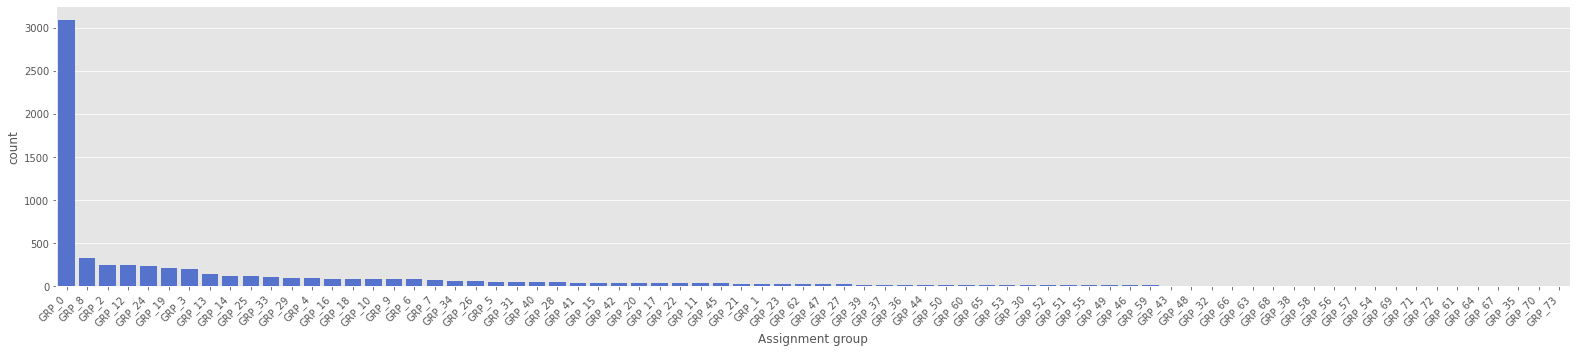

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = finaldf['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=finaldf, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show();

In [ ]:
max_len = finaldf['Assignment group'].value_counts().max()

High **imbalance** within the other group

Building Base Model

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
def tokenize_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [ ]:
all_words = list()
for comp in finaldf['trans_ticketlangue']:
    for w in tokenize_to_words(comp):
        all_words.append(w)

In [ ]:
all_words

['login',
 'issue',
 'verify',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'check',
 'user',
 'name',
 'ad',
 'reset',
 'password',
 'advise',
 'user',
 'login',
 'check',
 'caller',
 'confirm',
 'able',
 'login',
 'issue',
 'resolve',
 'outlook',
 'team',
 'meeting',
 'skype',
 'meeting',
 'etc',
 'appear',
 'outlook',
 'calendar',
 'somebody',
 'please',
 'advise',
 'correct',
 'kind',
 'can',
 'not',
 'log',
 'vpn',
 'can',
 'not',
 'log',
 'vpn',
 'well',
 'unable',
 'access',
 'hr',
 'tool',
 'page',
 'skype',
 'error',
 'unable',
 'log',
 'engineering',
 'tool',
 'skype',
 'event',
 'critical',
 'hostname',
 'company',
 'com',
 'value',
 'mountpoint',
 'threshold',
 'oracle',
 'sid',
 'erpdata',
 'event',
 'critical',
 'hostname',
 'company',
 'com',
 'value',
 'mountpoint',
 'threshold',
 'oracle',
 'sid',
 'erpdata',
 'srpsad',
 'srpsad',
 'data',
 'perpsrpsad',
 'ticket',
 'employment',
 'status',
 'new',
 'non',
 'employee',
 'enter',
 'user',
 'name',
 'unable',
 

In [ ]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 10041


In [ ]:
print('text\n', finaldf['trans_ticketlangue'][10], '\n')
print('Tokens\n', tokenize_to_words(finaldf['trans_ticketlangue'][10]))

text
 engineering tool say connect unable submit report 

Tokens
 ['engineering', 'tool', 'say', 'connect', 'unable', 'submit', 'report']


In [ ]:
index_dict = dict()
count = 1
index_dict['<unk>'] = 0
for word in set(all_words):
    index_dict[word] = count
    count += 1

In [ ]:
embeddings_index = {}
f = open('/content/drive/MyDrive/Colab Notebooks/glove.6B.300d.txt') # GLOBAL VECTOR
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
data_list = list()
for comp in finaldf['trans_ticketlangue']:
    sentence = np.zeros(300)
    count = 0
    for w in tokenize_to_words(comp):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
len(data_list[0])

300

In [ ]:
np.argwhere(np.isnan(np.array(data_list)))

array([[1660,    0],
       [1660,    1],
       [1660,    2],
       ...,
       [1777,  297],
       [1777,  298],
       [1777,  299]])

In [ ]:
indexList = np.argwhere(np.isnan(data_list).all(axis=1))
indexList

array([[1660],
       [1679],
       [1777]])

In [ ]:
flat_arr = np.reshape(indexList, len(indexList))

In [ ]:
arr = np.delete(data_list, flat_arr, axis=0)
arr

array([[-0.17049458,  0.23485463,  0.02109155, ...,  0.08009472,
        -0.15438992,  0.00590652],
       [-0.07336014, -0.11403243, -0.11988893, ..., -0.07228455,
        -0.00840742,  0.03305749],
       [-0.28328771,  0.23525889, -0.20728445, ..., -0.19283777,
        -0.03837822,  0.05325044],
       ...,
       [-0.22657925,  0.20633476, -0.00383575, ...,  0.30096726,
        -0.2354375 ,  0.18027638],
       [-0.02244869, -0.0454961 , -0.03802516, ..., -0.308186  ,
        -0.06684623,  0.11548279],
       [-0.23389871,  0.18753788,  0.036859  , ..., -0.28308587,
         0.0027875 , -0.12520288]])

In [ ]:
finaldf.drop(flat_arr,axis='index' , inplace=True)

In [ ]:
finaldf.shape

(6623, 4)

Build a base Classification model


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(finaldf['Assignment group'])
finaldf['Target'] = le.transform(finaldf['Assignment group'])
finaldf.head()

,Assignment group,trans_ticketlangue,length,len_words,Target
0,GRP_0,login issue verify user detail employee manage...,150,24,0
1,GRP_0,outlook team meeting skype meeting etc appear ...,98,14,0
2,GRP_0,can not log vpn can not log vpn well,36,9,0
3,GRP_0,unable access hr tool page,26,5,0
4,GRP_0,skype error,11,2,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(arr), finaldf.Target.values, 
    test_size=0.15, random_state=0)

In [ ]:
print(X_train.shape)

(5629, 300)


In [ ]:
y_train.shape

(5629,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf =  RandomForestClassifier(random_state=18)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.5513078470824949


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, pred , average='weighted')}")

Precision Score of the classifier is: 0.45830490187501816


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, pred , average='weighted')}")

Recall Score of the classifier is: 0.5513078470824949


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, pred , average='weighted')}")

F1 Score of the classifier is: 0.43060733484697


# GRP_0 has ~50 % of data , rest have other 50%. 
**First Approach**
We can 2 models 
1. Will Identify if it belongs to GRP_0 
2. Use second model to classify in other model

**Second Approach**
Resample whole data to middle level **319** i.e

 under sample Grp_0 to 19  
 
 over sample other groups to 319

In [ ]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts < 500 ].index)]
res['Assignment group'].value_counts().sum()

3533

In [ ]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts >= 500 ].index)]
res['Assignment group'].value_counts().sum()

3090

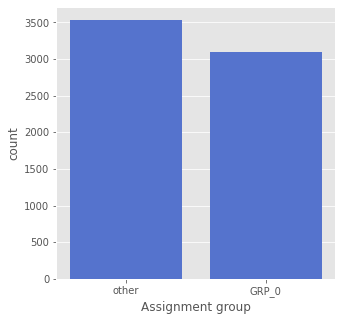

In [ ]:
# Create the Dataset for classifying GRP_0
ticketGRP0DF = finaldf.copy()
ticketGRP0DF['Assignment group']=ticketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = ticketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=ticketGRP0DF, color='royalblue',order=descending_order)

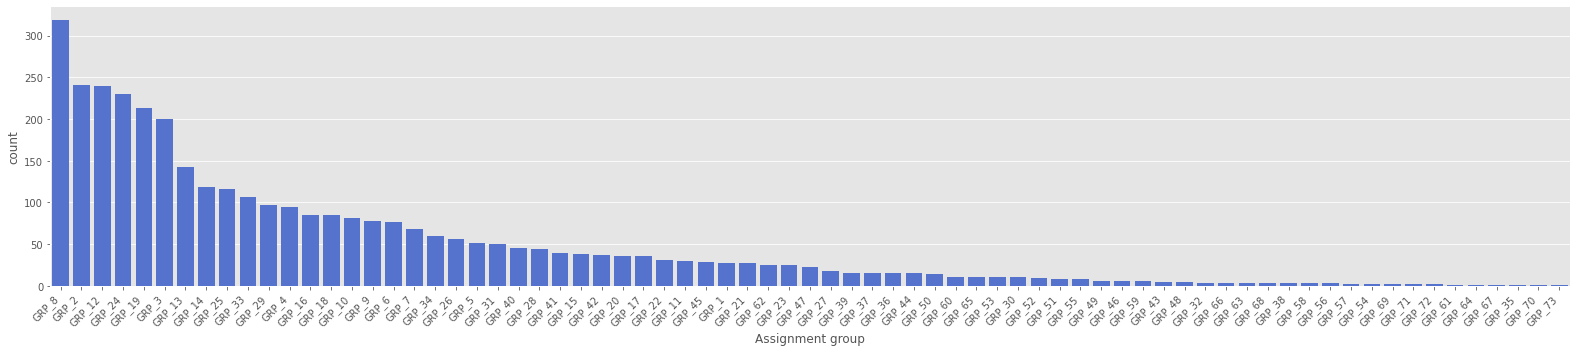

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
ticketOthersDF = finaldf[finaldf['Assignment group'] != 'GRP_0']

descending_order = ticketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=ticketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
ticketGRP0DF.head()

,Assignment group,trans_ticketlangue,length,len_words,Target
0,GRP_0,login issue verify user detail employee manage...,150,24,0
1,GRP_0,outlook team meeting skype meeting etc appear ...,98,14,0
2,GRP_0,can not log vpn can not log vpn well,36,9,0
3,GRP_0,unable access hr tool page,26,5,0
4,GRP_0,skype error,11,2,0


In [ ]:
maxlen = ticketGRP0DF['length'].max()
maxlen

5749

In [ ]:
ticketGRP0DF['Assignment group'].value_counts()

other    3533
GRP_0    3090
Name: Assignment group, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ticketGRP0DF['Assignment group'])
ticketGRP0DF['Target'] = le.transform(ticketGRP0DF['Assignment group'])
ticketGRP0DF.head()

,Assignment group,trans_ticketlangue,length,len_words,Target
0,GRP_0,login issue verify user detail employee manage...,150,24,0
1,GRP_0,outlook team meeting skype meeting etc appear ...,98,14,0
2,GRP_0,can not log vpn can not log vpn well,36,9,0
3,GRP_0,unable access hr tool page,26,5,0
4,GRP_0,skype error,11,2,0


In [ ]:
ticketGRP0DF['Target'].value_counts()

1    3533
0    3090
Name: Target, dtype: int64

In [ ]:
ticketGRP0DF.describe()

,length,len_words,Target
count,6623.00000,6623.000000,6623.000000
mean,153.68851,23.530424,0.533444
std,300.57972,46.157602,0.498918
min,5.00000,2.000000,0.000000
25%,39.00000,6.000000,0.000000
50%,88.00000,14.000000,1.000000
75%,170.00000,25.000000,1.000000
max,5749.00000,904.000000,1.000000


In [ ]:
def Get_upper_range(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    upper_range = Q3 + 1.5 * IQR
    return upper_range

In [ ]:
max_sentence_len = int(Get_upper_range(ticketGRP0DF , 'length') )
max_sentence_len

366

In [ ]:
X = []
X  = list(ticketGRP0DF["trans_ticketlangue"])


Y= ticketGRP0DF.Target.values

In [ ]:
Y

array([ 0,  0,  0, ...,  0, 59, 44])

In [ ]:
X

['login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve',
 'outlook team meeting skype meeting etc appear outlook calendar somebody please advise correct kind',
 'can not log vpn can not log vpn well',
 'unable access hr tool page',
 'skype error',
 'unable log engineering tool skype',
 'event critical hostname company com value mountpoint threshold oracle sid erpdata event critical hostname company com value mountpoint threshold oracle sid erpdata srpsad srpsad data perpsrpsad',
 'ticket employment status new non employee enter user name',
 'unable disable add in outlook',
 'ticket update inplant',
 'engineering tool say connect unable submit report',
 'hr tool site loading page correctly',
 'unable login hr tool sgxqsuojr xwbesorf cards',
 'user want reset password',
 'unable open payslip',
 'unable login company vpn unable login company vpn website try open new session use link able get 

In [ ]:
#Train for 1st model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42 , stratify = ticketGRP0DF['Target'])


In [ ]:
X_train

['need map mailbox colleague',
 'user need help connect wireless connection home user need help connect wireless connection home user connect lan home connect user system use teamviewer check network setting help user login home wireless disconnected home lan user confirm able login home wireless issue resolve',
 'access vpn add user employee group ryafbthn uacyltoe hxgaycze call issue',
 'business client work business client soft ware work computer kind',
 'account lock',
 'can not get prtqx print pc rqxw driver load',
 'problem wlan germany germany attach device problem wlan germany germany attach device contact info',
 'unable load erp',
 'unable login window unable login window error domain controller logon balance error contact mobile location germany germany',
 'reset window password account',
 'computer boot window touchpad usb mouse work computer boot window',
 'company email private phone please help set email access private cell phone well',
 'able access drive name language 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = max_sentence_len

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

We will be using GloVe word embeddings to convert text inputs to their numeric counterparts.

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/Colab Notebooks/glove_6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
!pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=76bfeb85537fe6a00fc56a43204b6b6e91cc37ccf912fa3dcb5ebd61f05dd030
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 366)]             0         
                                                                 
 embedding (Embedding)       (None, 366, 100)          890900    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,008,277
Trainable params: 117,377
Non-trainable params: 890,900
_________________________________________________________________
None


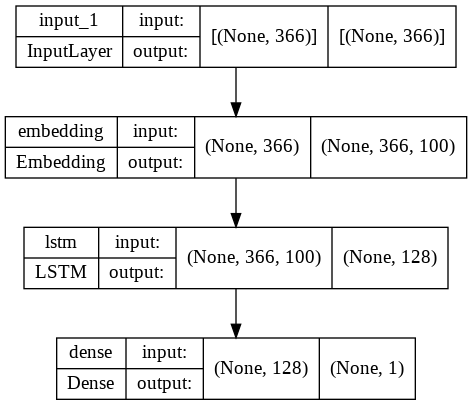

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
34/34 [==============================] - 68s 2s/step - loss: 0.6899 - acc: 0.5274 - val_loss: 0.6896 - val_acc: 0.5538
Epoch 2/5
34/34 [==============================] - 55s 2s/step - loss: 0.6896 - acc: 0.5283 - val_loss: 0.6881 - val_acc: 0.5538
Epoch 3/5
34/34 [==============================] - 42s 1s/step - loss: 0.6894 - acc: 0.5283 - val_loss: 0.6883 - val_acc: 0.5538
Epoch 4/5
34/34 [==============================] - 43s 1s/step - loss: 0.6894 - acc: 0.5283 - val_loss: 0.6886 - val_acc: 0.5538
Epoch 5/5
34/34 [==============================] - 43s 1s/step - loss: 0.6896 - acc: 0.5283 - val_loss: 0.6890 - val_acc: 0.5538


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

42/42 [==============================] - 5s 114ms/step - loss: 0.6883 - acc: 0.5336
Test Score: 0.6882858872413635
Test Accuracy: 0.5335848927497864


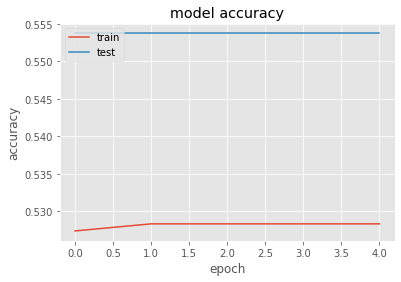

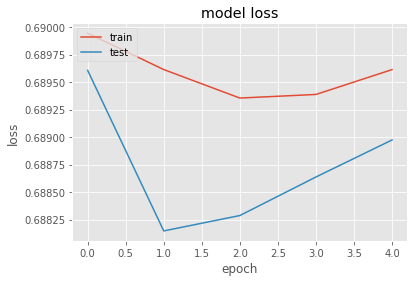

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()